In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# split function for training and testing data
from sklearn.model_selection import train_test_split

# Import sequential layer generator && layer data
# Import Dense layer (all input on the current layer)
# Import Model 
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Diplay data lib
import matplotlib.pyplot as plt

# Image handler lib 
from PIL import Image

print(tf.__version__)
print(pd.__version__)

2.1.0
1.0.4


In [2]:
images_folder_name = 'pokemon_so_deep/result/'

In [3]:
# Read CSV labels
labels = pd.read_csv('pokemon_so_deep/pokemon.csv', delimiter = ';')
labels

,name,type_1,type_2,sprite
0,Bulbasaur,Grass,Poison,001.png
1,Ivysaur,Grass,Poison,002.png
2,Venusaur,Grass,Poison,003.png
3,Charmander,Fire,NaN,004.png
4,Charmeleon,Fire,NaN,005.png
...,...,...,...,...
885,Drakloak,Dragon,Ghost,886.png
886,Dragapult,Dragon,Ghost,887.png
887,Zacian,Fairy,Steel,888.png
888,Zamazenta,Fighting,Steel,889.png


In [4]:
pokemon_types = labels[['type_1', 'type_2']]
pokemon_types

,type_1,type_2
0,Grass,Poison
1,Grass,Poison
2,Grass,Poison
3,Fire,NaN
4,Fire,NaN
...,...,...
885,Dragon,Ghost
886,Dragon,Ghost
887,Fairy,Steel
888,Fighting,Steel


In [5]:
# Create input data
list_of_images = []

for label_sprite in labels['sprite'] :
    file = Image.open(images_folder_name + label_sprite)

    # Virer alpha
    file = file.convert('RGB')
    data = np.array( file, dtype='uint8' )
    
    # Flatten
    data_reshape = data.reshape(-1)
    
    # Divide by pixel
    data_reshape_by_pixel = data_reshape / 255
    
    list_of_images.append(data_reshape_by_pixel)

list_of_images = np.array(list_of_images)

In [6]:
# input dico for all types (dataframe)
pokemon_types_number_dic = {
    'Bug' : 0,
    'Dark' : 1,
    'Dragon' : 2,
    'Electric' : 3,
    'Fairy' : 4,
    'Fighting' : 5,
    'Fire' : 6,
    'Flying' : 7,
    'Ghost' : 8,
    'Grass' : 9,
    'Ground' : 10,
    'Ice' : 11,
    'Normal' : 12,
    'Poison' : 13,
    'Psychic' : 14,
    'Rock' : 15,
    'Steel' : 16,
    'Water' : 17,
    18 : 18
}

pokemon_types.fillna(18, inplace = True)

pokemon_types['type_1'] = pokemon_types.type_1.apply(lambda x: pokemon_types_number_dic[x])
pokemon_types['type_2'] = pokemon_types.type_2.apply(lambda x: pokemon_types_number_dic[x])

pokemon_types

/home/ulphidius/.local/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/home/ulphidius/miniconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ulphidius/miniconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,type_1,type_2
0,9,13
1,9,13
2,9,13
3,6,18
4,6,18
...,...,...
885,2,8
886,2,8
887,4,16
888,5,16


In [7]:
# Create output data
output_array = []
for index, pokemon_type in pokemon_types.iterrows() :
    type_array = np.zeros(19)
    type_array[pokemon_type['type_1']] = 1
    type_array[pokemon_type['type_2']] = 1
    output_array.append(type_array)

output_array = np.array(output_array)

In [8]:
# Split data between test end train
X_train, X_test, y_train, y_test = train_test_split(list_of_images, output_array, test_size = 0.20, random_state=42)

In [9]:
# Not working
#model = Sequential()
#model.add(Input(shape=(32, 32, 3)))
#model.add(Dense(19, activation = 'softmax'))

input_format = Input(shape=list_of_images[0].shape)
invisible_layer_1 = Dense(10, activation = 'relu')(input_format)
invisible_layer_1 = Dense(5, activation = 'relu')(input_format)
output_end = Dense(19, activation = 'softmax')(invisible_layer_1)
model = Model(inputs=input_format, outputs=output_end)

# Change hyper parameters
optimizer_custom = tf.keras.optimizers.RMSprop(
    learning_rate=0.0000001,
    name="custom_rms"
)

#tf.keras.optimizers.Adam(
#    learning_rate=0.001,
#    beta_1=0.9,
#    beta_2=0.999,
#    epsilon=1e-07,
#    amsgrad=False,
#    name="Adam",
#    **kwargs
#)


model.compile(optimizer = optimizer_custom, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 15365     
_________________________________________________________________
dense_2 (Dense)              (None, 19)                114       
Total params: 15,479
Trainable params: 15,479
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Epochs number of loop over the model
fit_history = model.fit(X_train, y_train, 
                        epochs = 300, 
                        verbose=1,
                        validation_data=(X_test, y_test))

Train on 712 samples, validate on 178 samples
Epoch 1/300
712/712 [==============================] - 1s 746us/sample - loss: 6.2077 - accuracy: 0.0983 - val_loss: 6.2241 - val_accuracy: 0.0843
Epoch 2/300
712/712 [==============================] - 0s 124us/sample - loss: 6.2047 - accuracy: 0.0983 - val_loss: 6.2214 - val_accuracy: 0.0843
Epoch 3/300
712/712 [==============================] - 0s 122us/sample - loss: 6.2021 - accuracy: 0.0983 - val_loss: 6.2186 - val_accuracy: 0.0843
Epoch 4/300
712/712 [==============================] - 0s 117us/sample - loss: 6.1996 - accuracy: 0.0983 - val_loss: 6.2157 - val_accuracy: 0.0843
Epoch 5/300
712/712 [==============================] - 0s 121us/sample - loss: 6.1970 - accuracy: 0.0983 - val_loss: 6.2131 - val_accuracy: 0.0843
Epoch 6/300
712/712 [==============================] - 0s 121us/sample - loss: 6.1946 - accuracy: 0.0983 - val_loss: 6.2103 - val_accuracy: 0.0843
Epoch 7/300
712/712 [==============================] - 0s 123us/sample -

712/712 [==============================] - 0s 114us/sample - loss: 6.0114 - accuracy: 0.0983 - val_loss: 6.0050 - val_accuracy: 0.0843
Epoch 112/300
712/712 [==============================] - 0s 116us/sample - loss: 6.0103 - accuracy: 0.0983 - val_loss: 6.0038 - val_accuracy: 0.0843
Epoch 113/300
712/712 [==============================] - 0s 109us/sample - loss: 6.0092 - accuracy: 0.0983 - val_loss: 6.0025 - val_accuracy: 0.0843
Epoch 114/300
712/712 [==============================] - 0s 108us/sample - loss: 6.0082 - accuracy: 0.0983 - val_loss: 6.0013 - val_accuracy: 0.0843
Epoch 115/300
712/712 [==============================] - 0s 113us/sample - loss: 6.0072 - accuracy: 0.0983 - val_loss: 6.0001 - val_accuracy: 0.0843
Epoch 116/300
712/712 [==============================] - 0s 107us/sample - loss: 6.0060 - accuracy: 0.0983 - val_loss: 5.9987 - val_accuracy: 0.0843
Epoch 117/300
712/712 [==============================] - 0s 114us/sample - loss: 6.0049 - accuracy: 0.0983 - val_loss: 5

712/712 [==============================] - 0s 113us/sample - loss: 5.9608 - accuracy: 0.0955 - val_loss: 5.9480 - val_accuracy: 0.0787
Epoch 167/300
712/712 [==============================] - 0s 113us/sample - loss: 5.9600 - accuracy: 0.0955 - val_loss: 5.9472 - val_accuracy: 0.0787
Epoch 168/300
712/712 [==============================] - 0s 111us/sample - loss: 5.9592 - accuracy: 0.0955 - val_loss: 5.9462 - val_accuracy: 0.0787
Epoch 169/300
712/712 [==============================] - 0s 111us/sample - loss: 5.9584 - accuracy: 0.0955 - val_loss: 5.9455 - val_accuracy: 0.0787
Epoch 170/300
712/712 [==============================] - 0s 109us/sample - loss: 5.9577 - accuracy: 0.0955 - val_loss: 5.9445 - val_accuracy: 0.0787
Epoch 171/300
712/712 [==============================] - 0s 114us/sample - loss: 5.9570 - accuracy: 0.0955 - val_loss: 5.9438 - val_accuracy: 0.0787
Epoch 172/300
712/712 [==============================] - 0s 115us/sample - loss: 5.9562 - accuracy: 0.0955 - val_loss: 5

712/712 [==============================] - 0s 113us/sample - loss: 5.9276 - accuracy: 0.0843 - val_loss: 5.9121 - val_accuracy: 0.0843
Epoch 222/300
712/712 [==============================] - 0s 110us/sample - loss: 5.9271 - accuracy: 0.0843 - val_loss: 5.9117 - val_accuracy: 0.0843
Epoch 223/300
712/712 [==============================] - 0s 111us/sample - loss: 5.9267 - accuracy: 0.0843 - val_loss: 5.9113 - val_accuracy: 0.0843
Epoch 224/300
712/712 [==============================] - 0s 113us/sample - loss: 5.9263 - accuracy: 0.0843 - val_loss: 5.9109 - val_accuracy: 0.0843
Epoch 225/300
712/712 [==============================] - 0s 110us/sample - loss: 5.9259 - accuracy: 0.0829 - val_loss: 5.9104 - val_accuracy: 0.0843
Epoch 226/300
712/712 [==============================] - 0s 113us/sample - loss: 5.9255 - accuracy: 0.0829 - val_loss: 5.9100 - val_accuracy: 0.0843
Epoch 227/300
712/712 [==============================] - 0s 110us/sample - loss: 5.9251 - accuracy: 0.0829 - val_loss: 5

712/712 [==============================] - 0s 115us/sample - loss: 5.9084 - accuracy: 0.0618 - val_loss: 5.8938 - val_accuracy: 0.0562
Epoch 277/300
712/712 [==============================] - 0s 108us/sample - loss: 5.9082 - accuracy: 0.0604 - val_loss: 5.8936 - val_accuracy: 0.0562
Epoch 278/300
712/712 [==============================] - 0s 111us/sample - loss: 5.9079 - accuracy: 0.0604 - val_loss: 5.8933 - val_accuracy: 0.0562
Epoch 279/300
712/712 [==============================] - 0s 112us/sample - loss: 5.9077 - accuracy: 0.0604 - val_loss: 5.8931 - val_accuracy: 0.0562
Epoch 280/300
712/712 [==============================] - 0s 111us/sample - loss: 5.9075 - accuracy: 0.0618 - val_loss: 5.8929 - val_accuracy: 0.0562
Epoch 281/300
712/712 [==============================] - 0s 114us/sample - loss: 5.9073 - accuracy: 0.0618 - val_loss: 5.8927 - val_accuracy: 0.0562
Epoch 282/300
712/712 [==============================] - 0s 111us/sample - loss: 5.9070 - accuracy: 0.0604 - val_loss: 5

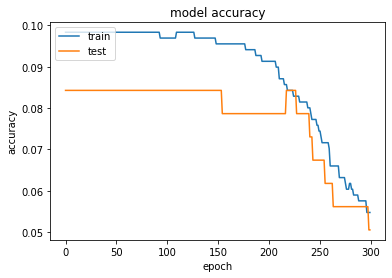

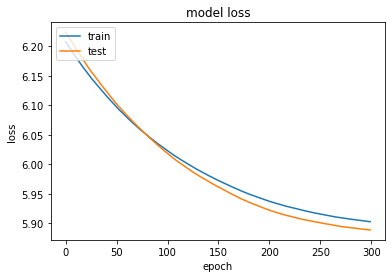

In [12]:
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()